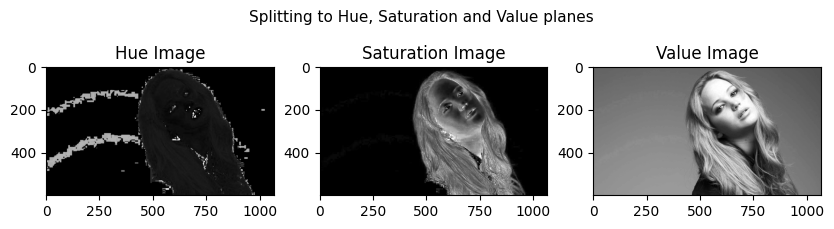

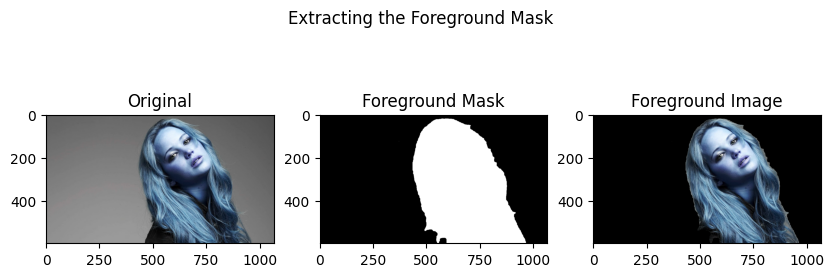

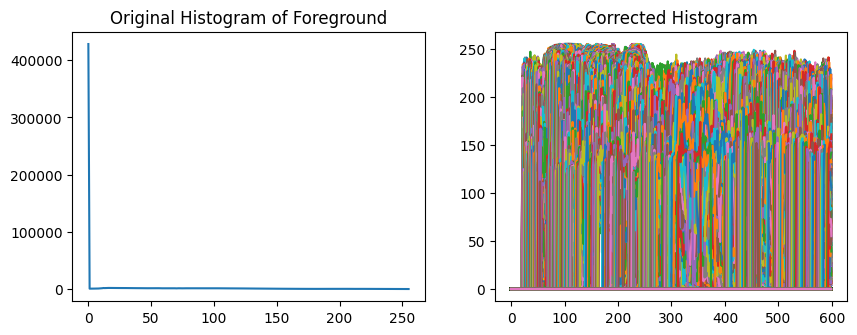

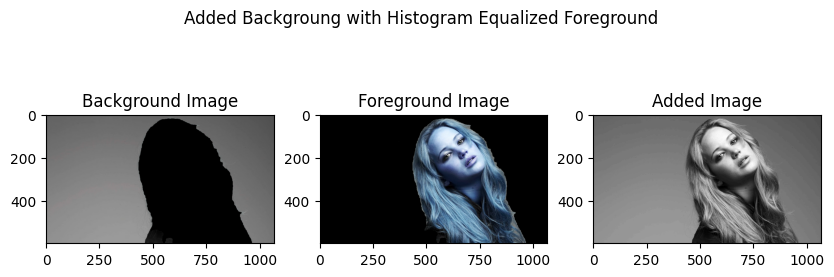

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#not changed
im = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
hue_img,sat_img,value_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("Splitting to Hue, Saturation and Value planes", fontsize=11)
ax[0].imshow(hue_img, cmap="gray")
ax[0].set_title('Hue Image')
ax[1].imshow(sat_img, cmap="gray")
ax[1].set_title('Saturation Image')
ax[2].imshow(value_img, cmap="gray")
ax[2].set_title('Value Image')
plt.show()

lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])
thresh = cv.inRange(sat_img, 15, 230)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))
morph = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
mask = morph
result = cv.bitwise_and(im, im, mask=mask)

fig, ax = plt.subplots(1,3, figsize=(10,3.5))
fig.suptitle("Extracting the Foreground Mask")
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Foreground Mask")
ax[2].imshow(result, cmap="gray")
ax[2].set_title("Foreground Image")
plt.show()

#histogram
cum_sum = np.cumsum(result) #cumulative sum

plt.figure(figsize = [10, 3.5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram of Foreground')
f_h = cv.calcHist([result],[0],None,[256],[0,256])
plt.plot(f_h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Corrected Histogram')
result_1 = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
eh = cv.equalizeHist(result_1)
plt.plot(eh)
plt.show()

#background image
mask1 = 255 - morph
b_im = cv.bitwise_and(im, im, mask=mask1)
b_im_1 = cv.cvtColor(b_im, cv.COLOR_BGR2GRAY);
#added image
im_1 = cv.addWeighted(b_im_1,0.5, result_1,0.5,0.0)

fig, ax = plt.subplots(1,3, figsize=(10,3.5))
fig.suptitle("Added Backgroung with Histogram Equalized Foreground")
ax[0].imshow(b_im, cmap="gray")
ax[0].set_title("Background Image")
ax[1].imshow(result, cmap="gray")
ax[1].set_title("Foreground Image")
ax[2].imshow(im_1, cmap="gray")
ax[2].set_title("Added Image")
plt.show()